In [8]:
import numpy as np

import pyphoplacecellanalysis
# import pyphoplacecellanalysis.External.python_peak_promience2d.peak_promience2d
from pyphoplacecellanalysis.External.peak_prominence2d import getProminence

# <getProminence>: Finding contour 10.000000
# <getProminence>: Finding contour 9.800000
# <getProminence>: Finding contour 9.600000
# <getProminence>: Finding contour 9.400000
# <getProminence>: Finding contour 9.200000
# <getProminence>: Finding contour 9.000000
# <getProminence>: Finding contour 8.800000
# <getProminence>: Finding contour 8.600000
# <getProminence>: Finding contour 8.400000
# <getProminence>: Finding contour 8.200000
# <getProminence>: Finding contour 8.000000
# <getProminence>: Finding contour 7.800000
# <getProminence>: Finding contour 7.600000
# <getProminence>: Finding contour 7.400000
# <getProminence>: Finding contour 7.200000
# <getProminence>: Finding contour 7.000000
# <getProminence>: Finding contour 6.800000
# <getProminence>: Finding contour 6.600000
# <getProminence>: Finding contour 6.400000
# <getProminence>: Finding contour 6.200000
# <getProminence>: Finding contour 6.000000
# <getProminence>: Finding contour 5.800000
# <getProminence>: Finding cont

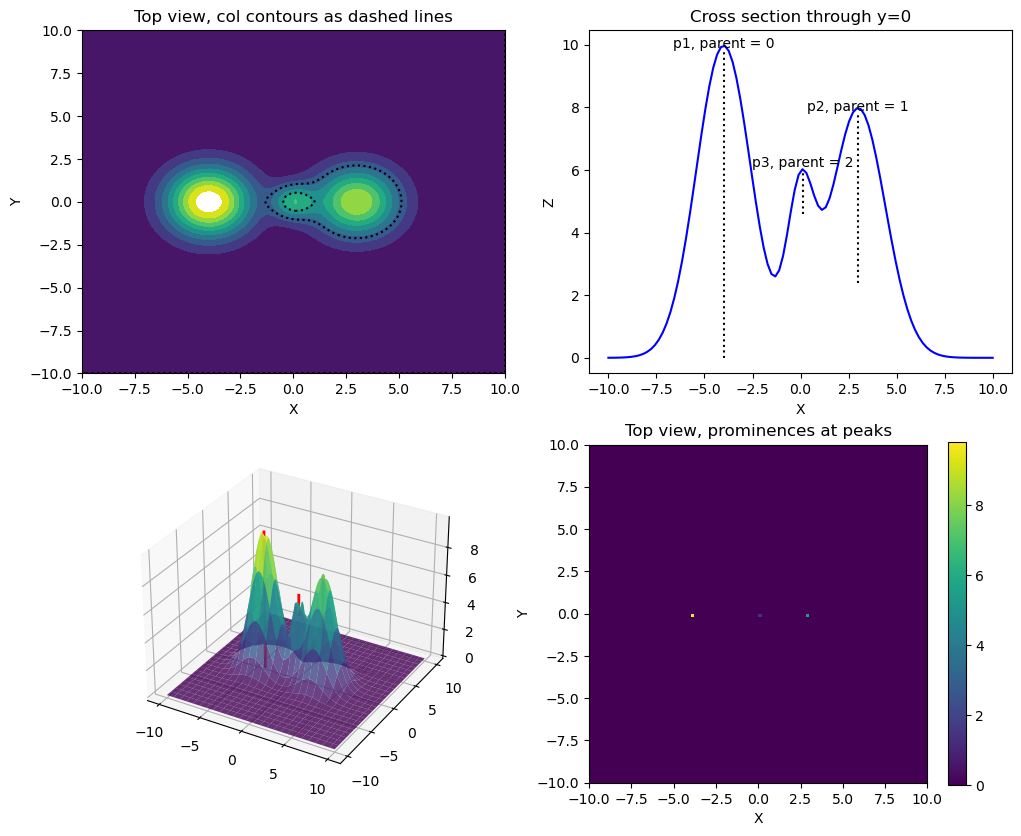

{1: {'area': 400.0,
     'center': array([-4.00910131, -0.02094039]),
     'col_level': 5.316435338332057e-16,
     'contour': Path(array([[ -9.7979798 , -10.        ],
       [ -9.5959596 , -10.        ],
       [ -9.39393939, -10.        ],
       [ -9.19191919, -10.        ],
       [ -8.98989899, -10.        ],
       [ -8.78787879, -10.        ],
       [ -8.58585859, -10.        ],
       [ -8.38383838, -10.        ],
       [ -8.18181818, -10.        ],
       [ -7.97979798, -10.        ],
       [ -7.77777778, -10.        ],
       [ -7.57575758, -10.        ],
       [ -7.37373737, -10.        ],
       [ -7.17171717, -10.        ],
       [ -6.96969697, -10.        ],
       [ -6.76767677, -10.        ],
       [ -6.56565657, -10.        ],
       [ -6.36363636, -10.        ],
       [ -6.16161616, -10.        ],
       [ -5.95959596, -10.        ],
       [ -5.75757576, -10.        ],
       [ -5.55555556, -10.        ],
       [ -5.35353535, -10.        ],
       [ -5.15151

In [10]:
#------------------A toy example------------------
xx=np.linspace(-10,10,100)
yy=np.linspace(-10,10,100)

XX,YY=np.meshgrid(xx,yy)
slab=np.zeros(XX.shape)

# add 3 peaks
slab+=5*np.exp(-XX**2/1**2 - YY**2/1**2)
slab+=8*np.exp(-(XX-3)**2/2**2 - YY**2/2**2)
slab+=10*np.exp(-(XX+4)**2/2**2 - YY**2/2**2)

step=0.2
zmax=slab.max()
peaks, idmap, promap, parentmap = getProminence(slab, step, lats=yy, lons=xx, min_area=None, include_edge=True)

#-------------------Plot------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure=plt.figure(figsize=(12,10),dpi=100)

ax1=figure.add_subplot(2,2,1)

ax1.contourf(XX,YY,slab,levels=np.arange(0,zmax,1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Top view, col contours as dashed lines')

for kk,vv in peaks.items():
    print (kk)
    cols=vv['contour']
    ax1.plot(cols.vertices[:,0],cols.vertices[:,1],'k:')

line=slab[slab.shape[0]//2]
ax2=figure.add_subplot(2,2,2)
ax2.plot(xx,line,'b-')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('Cross section through y=0')

for kk,vv in peaks.items():
    xii,yii=vv['center']
    z2ii=vv['height']
    pro=vv['prominence']
    z1ii=z2ii-pro
    ax2.plot([xii,xii], [z1ii,z2ii],'k:')
    ax2.text(xii,z2ii,'p%d, parent = %d' %(kk,vv['parent']),
            horizontalalignment='center',
            verticalalignment='bottom')

ax3=figure.add_subplot(2,2,3,projection='3d')
ax3.plot_surface(XX,YY,slab,rstride=4,cstride=4,cmap='viridis',alpha=0.8)

for kk,vv in peaks.items():
    xii,yii=vv['center']
    z2ii=vv['height']
    pro=vv['prominence']
    z1ii=z2ii-pro
    ax3.plot([xii,xii],[yii,yii],[z1ii,z2ii], color='r', linewidth=2)

ax4=figure.add_subplot(2,2,4)
cs=ax4.imshow(promap,origin='lower',interpolation='nearest',
        extent=[-10,10,-10,10])
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_title('Top view, prominences at peaks')
plt.colorbar(cs,ax=ax4)

plt.show(block=False)

from pprint import pprint
pprint(peaks)